# Data Cleaning

## 1. Importing Packages and Loading Data

In [3]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns

In [4]:
df = pd.read_csv("/Users/matteo/Documents/PersonalProjects/airbnb-pricing-optimization/data/listings-2.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20250901181253,2025-09-01,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/be1bf5ac-a955...,1169,...,4.89,4.98,4.78,STR-0006854,f,1,1,0,0,2.53
1,5858,https://www.airbnb.com/rooms/5858,20250901181253,2025-09-01,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/hosting/Hosti...,8904,...,4.85,4.77,4.68,NaN,f,1,1,0,0,0.53
2,8014,https://www.airbnb.com/rooms/8014,20250901181253,2025-09-01,city scrape,female HOST quiet fast internet market parking,Room is on the second floor so it gets a good ...,"The neighborhood is very residential, close to...",https://a0.muscache.com/pictures/2cc1fc3d-0ae0...,22402,...,4.94,4.59,4.66,STR-0000974,f,3,0,3,0,0.57
3,8142,https://www.airbnb.com/rooms/8142,20250901181253,2025-09-01,city scrape,*FriendlyRoom Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/hosting/Hosti...,21994,...,4.80,4.70,4.70,NaN,f,20,0,20,0,0.07
4,8339,https://www.airbnb.com/rooms/8339,20250901181253,2025-09-01,city scrape,Historic Alamo Square Victorian,"For creative humans who love art, space, photo...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,5.00,4.94,4.75,STR-0000264,f,1,1,0,0,0.13


In [5]:
# check for NAs
NAs = pd.DataFrame(df.isna().sum().sort_values(ascending = False))
NAs[NAs[0] > 0]

,0
neighbourhood_group_cleansed,7780
calendar_updated,7780
neighborhood_overview,3097
neighbourhood,3097
host_about,3084
license,2647
price,1985
estimated_revenue_l365d,1985
beds,1958
bathrooms,1934


## 2. Cleaning Data

In [7]:
# create new dataframe that will serve as the clean version of the raw dataframe
df_clean = df

### Pricing

In [9]:
# convert price to a float
df_clean["price"] = df_clean["price"].str.replace("$", "").str.replace(",", "").astype(float)


# save the observations with missing prices, and remove them from clean dataframe
df_missing_prices = df_clean[df_clean["price"].isna()]
df_clean = df_clean[df_clean["price"].isna() == False]


# log transform prices
df_clean["log_price"] = np.log(df_clean["price"])

/var/folders/l3/nx1r6y2154j6kp9618n899p80000gn/T/ipykernel_24368/2600617343.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Drop Unnecessary Columns

In [11]:
# drop neighbourhood_group_cleansed and calendar_updated --> all entries have NAs
# drop neighbourhood --> cleansed neighborhood variable available with no NAs
# drop neighborhood_overview --> large text variables with little effect on pricing
# drop host_about, host_location and host_neighbourhood --> many missing values, info about the host that is not relavent
# drop first_review and last_review --> many NA values, have multiple other review variables that will be more signficant
# drop max_max nights, min_max nights, etc. cols --> confusing and not helpful for predicting price
# drop description --> NAs present, large text data, not ideal for my models
# drop bathrooms_text --> NAs present, already have bathroom variable for model training
df_clean = df_clean.drop(columns = ["neighbourhood_group_cleansed", 
                                    "calendar_updated", 
                                    "neighbourhood", 
                                    "neighborhood_overview", 
                                    "host_about", 
                                    "host_location", 
                                    "host_neighbourhood",
                                    "first_review", 
                                    "last_review",
                                    "maximum_maximum_nights", 
                                    "minimum_minimum_nights", 
                                    "maximum_minimum_nights", 
                                    "minimum_maximum_nights",
                                    "description", 
                                    "bathrooms_text"])

### Fill in NAs

In [13]:
# reviews per month NAs changed to 0's
df_clean["reviews_per_month"] = df_clean["reviews_per_month"].fillna(df_clean["reviews_per_month"].median())

# change all NAs in license to "None" because NA means that no license is present
df_clean["license"] = df_clean["license"].fillna("None")

# remove the single listing with no host name
df_clean = df_clean[df_clean["host_name"].isna() == False]

# make "host_response_rate" into a numeric variable by removing the percentages and making NAs median values
df_clean["host_response_rate"] = df_clean["host_response_rate"].str.replace("%", "").astype(float)
df_clean["host_response_rate"] = df_clean["host_response_rate"].fillna(df_clean["host_response_rate"].median())

# same thing for "host_acceptance_rate"
df_clean["host_acceptance_rate"] = df_clean["host_acceptance_rate"].str.replace("%", "").astype(float)
df_clean["host_acceptance_rate"] = df_clean["host_acceptance_rate"].fillna(df_clean["host_acceptance_rate"].median())

# fill NAs in "host_is_superhost" to f
df_clean["host_is_superhost"] = df_clean["host_is_superhost"].fillna("f")

# fill NAs in "has_availability" to f
df_clean["has_availability"] = df_clean["has_availability"].fillna("f")

# convert "host_response_time" to numeric, then fill with median
response_time_map = {
    "within an hour": 4,
    "within a few hours": 3,
    "within a day": 2,
    "a few days or more": 1
}

df_clean["host_response_time"] = df_clean["host_response_time"].map(response_time_map)
df_clean["host_response_time"] = df_clean["host_response_time"].fillna(df_clean["host_response_time"].median())
df_clean = df_clean.drop(columns=["host_response_time"])

# "bedrooms" --> drop 32 rows?
df_clean = df_clean[df_clean["bedrooms"].isna() == False]

# "beds" --> fill w median? or drop 26 rows?
df_clean["beds"] = df_clean["beds"].fillna(df_clean["beds"].median())

# "bathrooms" --> drop 5 rows? 
df_clean = df_clean[df_clean["bathrooms"].isna() == False]

### Impute Review Scores

In [15]:
# reviews NA changed to median of all reviews, these are scored 0-5 and if all NAs were changed to 0's, the data would be very skewed

df_clean["review_scores_location"] = df_clean["review_scores_location"].fillna(df_clean["review_scores_location"].median())
df_clean["review_scores_value"] = df_clean["review_scores_value"].fillna(df_clean["review_scores_value"].median())
df_clean["review_scores_rating"] = df_clean["review_scores_rating"].fillna(df_clean["review_scores_rating"].median())
df_clean["review_scores_cleanliness"] = df_clean["review_scores_cleanliness"].fillna(df_clean["review_scores_cleanliness"].median())
df_clean["review_scores_checkin"] = df_clean["review_scores_checkin"].fillna(df_clean["review_scores_checkin"].median())
df_clean["review_scores_communication"] = df_clean["review_scores_communication"].fillna(df_clean["review_scores_communication"].median())
df_clean["review_scores_accuracy"] = df_clean["review_scores_accuracy"].fillna(df_clean["review_scores_accuracy"].median())

### Clean Dataframe Check

In [17]:
# check to make sure all NAs are handled
NAs = pd.DataFrame(df_clean.isna().sum().sort_values(ascending = False))
NAs[NAs[0] > 0]

,0


In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5757 entries, 0 to 7779
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5757 non-null   int64  
 1   listing_url                                   5757 non-null   object 
 2   scrape_id                                     5757 non-null   int64  
 3   last_scraped                                  5757 non-null   object 
 4   source                                        5757 non-null   object 
 5   name                                          5757 non-null   object 
 6   picture_url                                   5757 non-null   object 
 7   host_id                                       5757 non-null   int64  
 8   host_url                                      5757 non-null   object 
 9   host_name                                     5757 non-null   object

## 3. Baseline Model Training

### Import Packages

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Assign Variable Groups and Create Train/Test Split

In [23]:
quantitative_vars = [
    # Property characteristics
    "accommodates",
    "bathrooms",
    "bedrooms", 
    "beds",
    
    # Location
    "latitude",
    "longitude",
    
    # Host metrics
    "host_response_rate",
    "host_acceptance_rate",
    "host_listings_count",
    "host_total_listings_count",
    "calculated_host_listings_count",
    "calculated_host_listings_count_entire_homes",
    "calculated_host_listings_count_private_rooms",
    "calculated_host_listings_count_shared_rooms",
    
    # Reviews
    "number_of_reviews",
    "number_of_reviews_ltm",
    "number_of_reviews_l30d",
    "number_of_reviews_ly",
    "reviews_per_month",
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",
    
    # Availability
    "availability_30",
    "availability_60",
    "availability_90",
    "availability_365",
    "availability_eoy",
    "minimum_nights",
    "maximum_nights",
    "minimum_nights_avg_ntm",
    "maximum_nights_avg_ntm",
    
    # Other
    "estimated_occupancy_l365d",
    "estimated_revenue_l365d"
]

categorical_vars = [
    # Core categories
    #"neighbourhood_cleansed",
    #"property_type",
    "room_type",
    
    # Host attributes
    "host_is_superhost",
    "host_has_profile_pic",
    "host_identity_verified",
    
    # Listing attributes
    "instant_bookable",
    "has_availability"#,
    
    # License
    #"license"
]

ignore = [
    "id",
    "listing_url",
    "scrape_id",
    "last_scraped",
    "source",
    "name",
    "picture_url",
    "host_id",
    "host_url",
    "host_name",
    "host_since",
    "host_thumbnail_url",
    "host_picture_url",
    "host_verifications",
    "calendar_last_scraped",
    "amenities",  # Need to parse separately
    "log_price",  # This is your target
    "price",  # Original target
    "property_type",
    "license"
]

target = "log_price"

X = df_clean.drop(ignore, axis = 1)
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Preprocess

In [25]:
preproc = make_column_transformer(
    (StandardScaler(), quantitative_vars),
    (OneHotEncoder(drop = "first"), categorical_vars)
)

### Define and Fit

In [27]:
Linear_Pipeline = make_pipeline(
    preproc,
    LinearRegression()
)

Linear_Pipeline.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('standardscaler', ...), ('onehotencoder', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Predict and Analyze Results

In [29]:
y_pred = Linear_Pipeline.predict(X_test)
y_pred_train = Linear_Pipeline.predict(X_train)

y_pred

array([4.63410203, 4.34738072, 6.01178676, ..., 4.62508802, 4.85312131,
       5.72665572], shape=(1152,))

In [56]:
print("MSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R Squared (Test): ", r2_score(y_test, y_pred))
print("R Squared (Train): ", r2_score(y_train, y_pred_train))

MSE:  0.5589959917815418
MAE:  0.3590056923588858
R Squared (Test):  0.5425580037257594
R Squared (Train):  0.6492858994795465


In [58]:
preproc = Linear_Pipeline.named_steps["columntransformer"]
lin     = Linear_Pipeline.named_steps["linearregression"]


feat_names = preproc.get_feature_names_out()
coefs = lin.coef_.ravel()
coef_df = pd.DataFrame({"feature": feat_names, "coef": coefs})

In [60]:
coef_df.sort_values("coef", ascending = False)

,feature,coef
10,standardscaler__calculated_host_listings_count,2.968911
9,standardscaler__host_total_listings_count,0.292771
0,standardscaler__accommodates,0.185840
2,standardscaler__bedrooms,0.180680
4,standardscaler__latitude,0.165754
36,standardscaler__estimated_revenue_l365d,0.101738
21,standardscaler__review_scores_cleanliness,0.090857
41,onehotencoder__host_has_profile_pic_t,0.080453
28,standardscaler__availability_90,0.065103
26,standardscaler__availability_30,0.059190


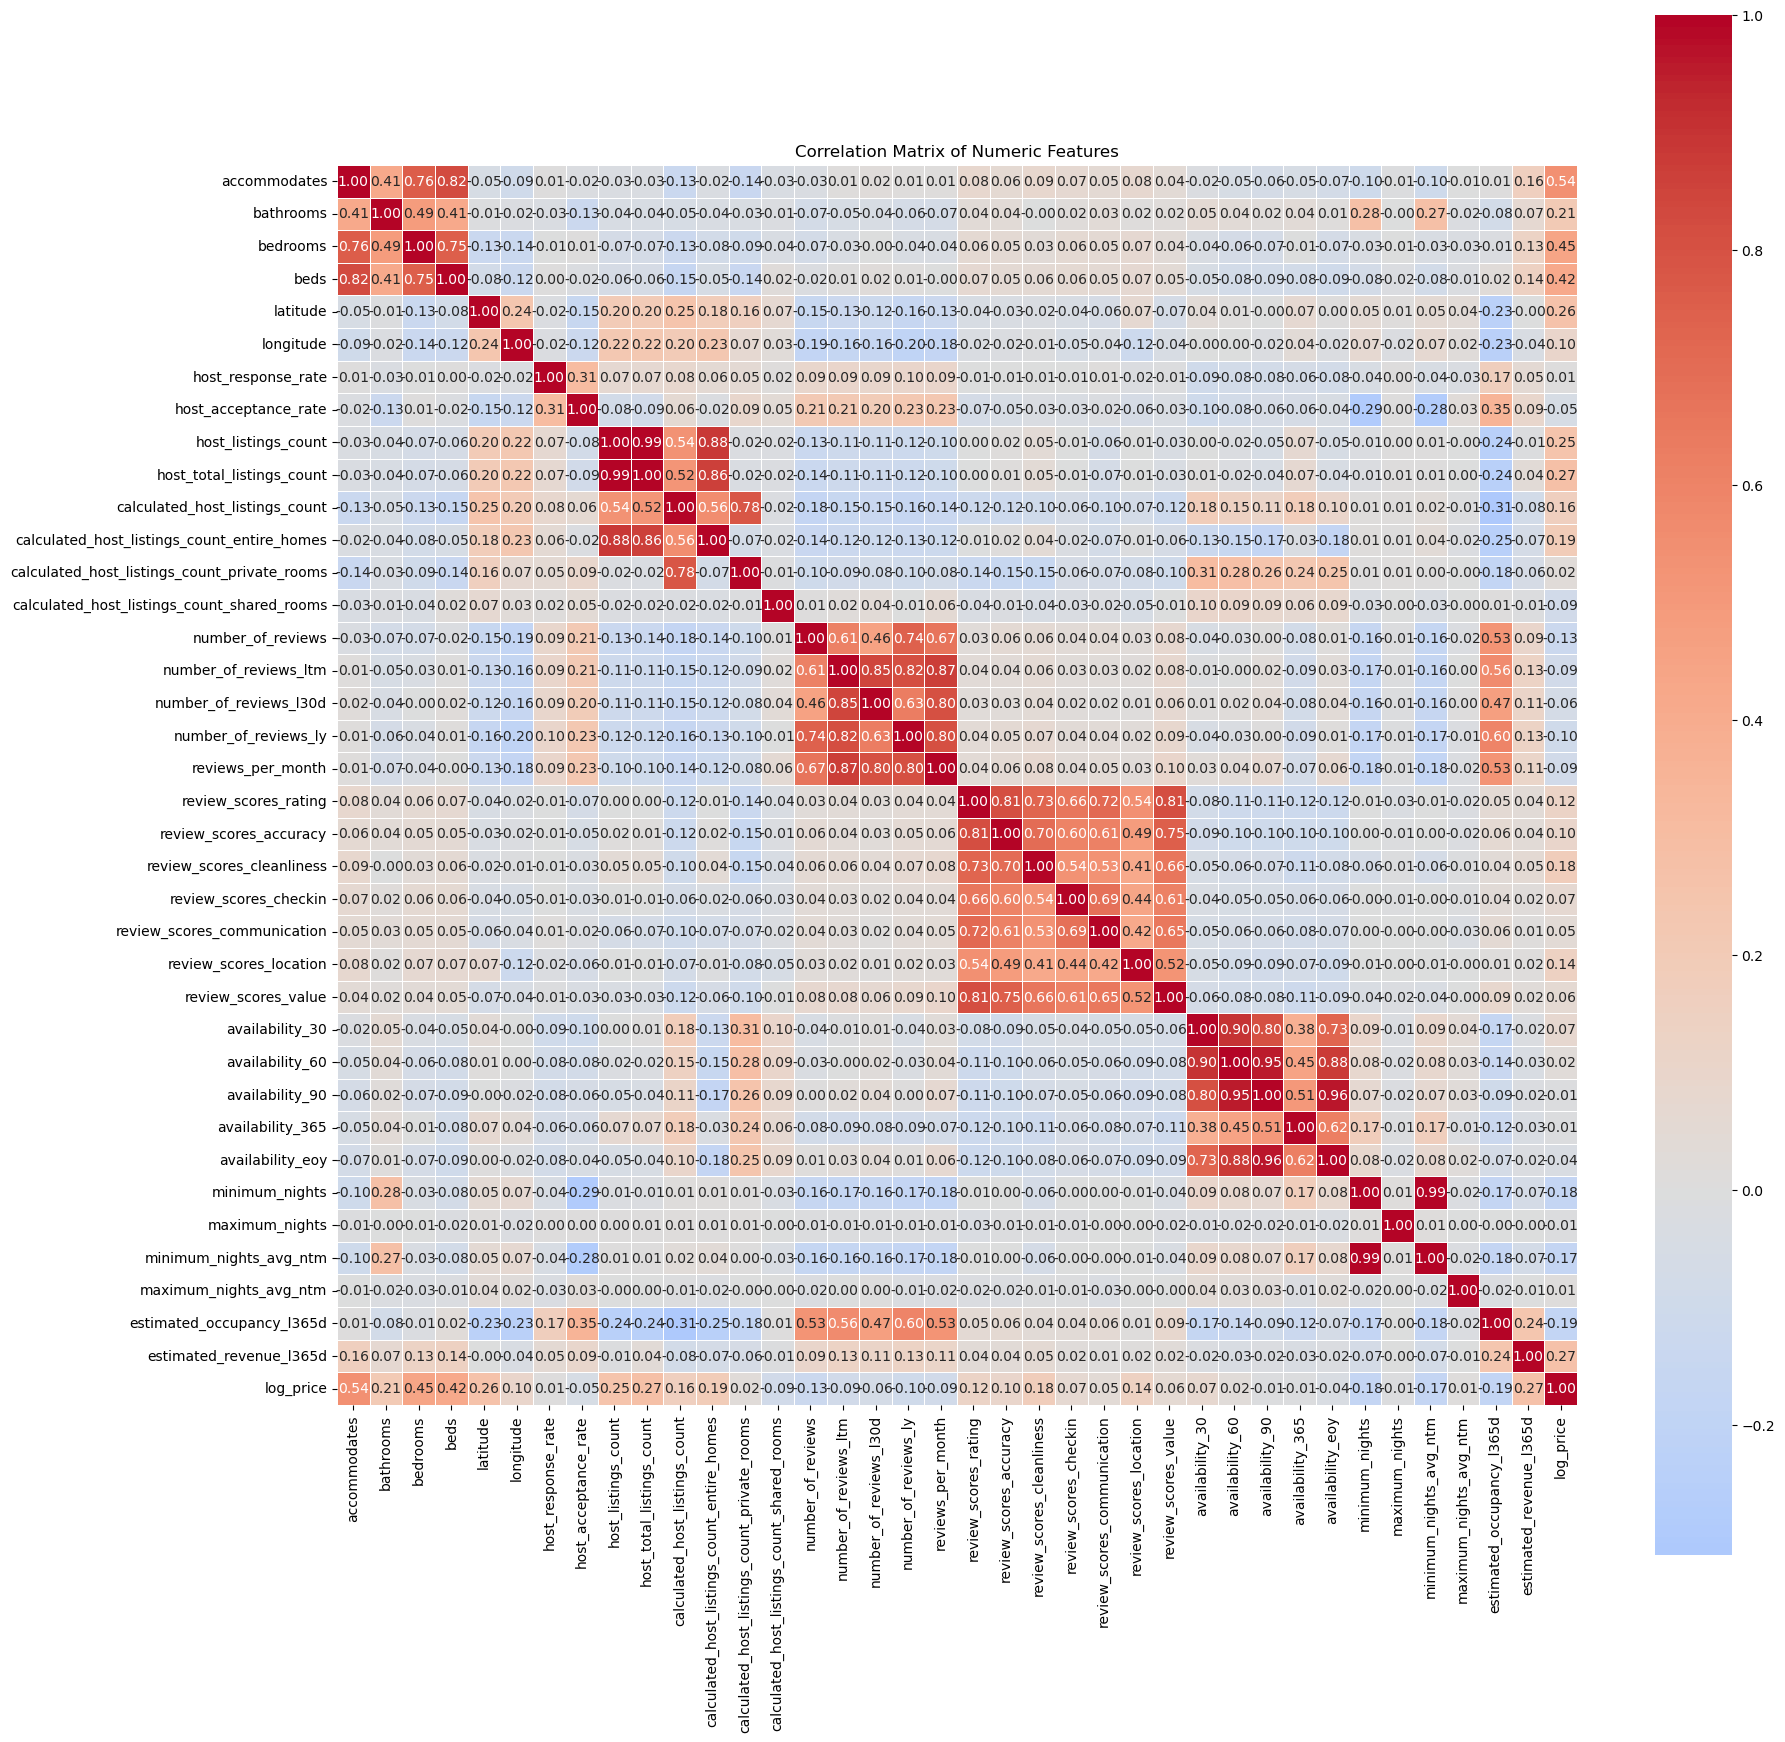

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt


quantitative_vars = [
    # Property characteristics
    "accommodates",
    "bathrooms",
    "bedrooms", 
    "beds",
    
    # Location
    "latitude",
    "longitude",
    
    # Host metrics
    "host_response_rate",
    "host_acceptance_rate",
    "host_listings_count",
    "host_total_listings_count",
    "calculated_host_listings_count",
    "calculated_host_listings_count_entire_homes",
    "calculated_host_listings_count_private_rooms",
    "calculated_host_listings_count_shared_rooms",
    
    # Reviews
    "number_of_reviews",
    "number_of_reviews_ltm",
    "number_of_reviews_l30d",
    "number_of_reviews_ly",
    "reviews_per_month",
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",
    
    # Availability
    "availability_30",
    "availability_60",
    "availability_90",
    "availability_365",
    "availability_eoy",
    "minimum_nights",
    "maximum_nights",
    "minimum_nights_avg_ntm",
    "maximum_nights_avg_ntm",
    
    # Other
    "estimated_occupancy_l365d",
    "estimated_revenue_l365d",
    
    # Target
    "log_price"
]

correlation_matrix = df_clean[quantitative_vars].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            center=0, fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()